###**Persamaan sistem LTI:**


*   Orde 6:
#### y(n) = ax(n) + by(n-1) + cy(n-2) + dy(n-3) + ey(n-4) + fy(n-5) + gy(n-6)
*   Orde 7:

#### y(n) = ax(n) + by(n-1) + cy(n-2) + dy(n-3) + ey(n-4) + fy(n-5) + gy(n-6) + hy(n-7)

*   Orde 8:
#### y(n) = ax(n) + by(n-1) + cy(n-2) + dy(n-3) + ey(n-4) + fy(n-5) + gy(n-6) + hy(n-7) + iy(n-8)

### **Environment (Batasan konstanta yang diperbolehkan menyesuaikan orde)**:
####-3 < a < 3
####-0.99 < b < 0.99
####-0.99 < c < 0.99
####-0.99 < d < 0.99
####.         .          .     
####.         .          .  


### **Action yang diperbolehkan (Menyesuaikan Orde):**
#### a + 0.20689655
#### a - 0.20689655
#### b + 0.06827586
#### b - 0.06827586
#### c + 0.06827586
#### c - 0.06827586
#### d + 0.06827586
#### d - 0.06827586
#.         .        .
#.         .        .


### Gambaran Q Matrix:

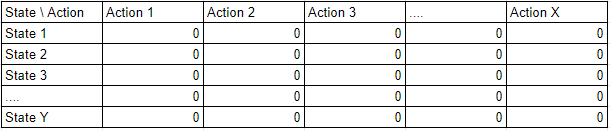

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import math
from scipy import signal

In [2]:
#Fungsi Utama Model Reinforcement Learning

class RLModel():
  def __init__(self):
    self.input = []
    self.output = []
    self.orde = 0
    self.q_matrix = []
    self.q_matrix_state = []
    self.min = []
    self.max = []
    self.interval = []
  
  def train(self,episode, gamma):
    print("training mulai")
    for i in tqdm (range (episode), desc="Progress"):
      # buat random cons
      array_random_num = [np.random.randint(0, 30) for i in range (self.orde+1)]
      currState = self.min + self.interval*array_random_num
      # run 1 episode
      out = False
      iter = 0
      while iter < 100 and out == False :
        currState = self.action(currState, gamma)
        iter +=1
        m=0
        while m < len(currState) and out == False:
          if (currState[m]>3) | (currState[m]<-3):
            out = True
          m+=1
 
    print("")
    print("training selesai")

  def action(self,currState, gamma):

    array_of_reward = [] # arr berisi kemungkinan reward untuk setiap kemungkinan action
    for i in range (self.orde*2 + 2):
      j = int (np.floor(i/2))
      state_cons = copy.deepcopy(currState)
      state_cons[j] += pow(-1, i%2) * self.interval[j]
      array_of_reward.append (self.Reward_Calculation (state_cons))
    
    current_state_reward = np.max(array_of_reward) # max reward pada currState
    next_action = array_of_reward.index (current_state_reward) # action yang dapat dipilih sesuai max reward

    # hitung nextState_cons
    nextState_cons = copy.deepcopy(currState)
    j = int (np.floor(next_action/2)) # iterator
    nextState_cons[j] += pow(-1, next_action%2) * self.interval[j]

    next_state_reward = self.RewardState (nextState_cons)   
    updatedReward = current_state_reward + gamma*next_state_reward
    self.Q_Update (currState, next_action, updatedReward)                # perintah update q_matrix

    return (nextState_cons)

  def Reward_Calculation (self,cons):       # Perhitungan reward dengan RMSE Loss Function
    response = Respon_Sistem(input, cons)
    square_error = sum ((self.output-response) ** 2)
    root_mean_square_error = math.sqrt(square_error / len(response))
    reward = 100*np.exp(-root_mean_square_error)
    return reward 

  def RewardState (self,nextState_cons):        # Mengassign Reward ke State
    i=0
    index = 0
    the_state = False
    next_string_State = ' '.join([str(number) for number in nextState_cons])
    while i < len(self.q_matrix_state) and index !=i:
      if (self.q_matrix_state[i] == next_string_State):
            index = i
      i+=1
    
    if (the_state == True): # jika state sudah ada di q_matrix
        next_state_reward = np.max (self.q_matrix[index])
    else: # jika state belum ada
        next_state_reward = 0
    
    return (next_state_reward)

  def Q_Update (self,state_cons, action, reward):     # Fungsi untuk update Q Matrix
    i=0
    index = 0
    the_state = False
    stringState = ' '.join([str(num) for num in state_cons]) # merubah konstanta menjadi string dengan spasi diantaranya

    while i < len(self.q_matrix_state) and index !=i:
      if (self.q_matrix_state[i] == stringState):
          the_state = True
          index = i
      i+=1
      
    if (the_state == True): # jika state sudah ada di q_matrix
        self.q_matrix[index][action] = reward
    else: # jika state belum ada
        self.q_matrix_state.append (stringState)
        tempArr = [0 for i in range (self.orde*2 + 2)]
        tempArr[action] = reward
        self.q_matrix.append (tempArr)

  def Max_Reward(self):                 #Fungsi untuk mencari Max Reward dari Q Matrix
    max = 0
    index = 0
    for i in range (len(self.q_matrix)):
      temp_max = np.max(self.q_matrix[i])
      if (temp_max > max):
        max = temp_max
        index = i
    return index

In [3]:
def Environment (min, max, interval, orde): #Environment (Batasan lingkungan)
    arr_min = np.array ([-3])
    arr_max = np.array ([3])

    for i in range(orde):
      arr_min = np.append (min, [-0.99 for i in range (orde)])
      arr_max = np.append (max, [0.99 for i in range (orde)])
    
    arr_interval = (arr_max-arr_min) / (interval-1)

    return (arr_min,arr_max,arr_interval)

def sinyal_kotak(periode):          # Fungsi sinyal kotak
  input = []
  for i in range (100):
    if (i % periode <= 1):
        input.append (1)
    else:
        input.append (-1)
  return (np.array(input))

def Respon_Sistem(input,cons):        # Fungsi perhitungan output
    orde = len(cons)-1
    output = [0 for i in range (orde)]
    for i in range (100-orde):
        j = i+orde
        temp = cons[0] * input[j]
        for k in range (orde):
            temp += cons[k+1] * output[j-(k+1)]
        output.append (temp)
    return (np.array(output))

def str_cons(stringState):
    global min, interval
    convState = stringState.split()
    convState = [float(num) for num in convState]
    return (convState)

def print_transfer_function(cons):              #fungsi print persamaan Transfer Function
  print("y(n) = ",end="")
  print("{}x(n)".format(round(cons[0],4)),end="")
  for i in range(len(cons)):
    if i ==0:
      pass
    else:
      if cons[i] > 0:
        print("+{}y(n-{})".format(round(cons[i],4),i),end="")
      else:
        print("{}y(n-{})".format(round(cons[i],4),i),end="")
  print("")

In [4]:
# konstanta sistem yang ingin diprediksi
# y(n) = ax(n) + by(n) + cy(n-1) + ...

# Orde 6
#cons = [-1.91, -0.1, 0.2, -0.7, 0.35, 0.3, 0]
cons = [1.5, -0.25, 0.15, -0.05, 0.25, 0.55, 0.05]

# Orde 7
#cons = [-1.91, -0.1, 0.2, -0.7, 0.35, 0.3, 0, -0.01]
#cons = [1.5, -0.25, 0.15, -0.05, 0.25, 0.55, 0.05, -0.04]

# Orde 8
#cons = [-1.91, -0.1, 0.2, -0.7, 0.35, 0.3, 0, -0.01, 0.92]
#cons = [1.5, -0.25, 0.15, -0.05, 0.25, 0.55, 0.05, -0.04, -0.5]

orde = len(cons) - 1
input = sinyal_kotak(5)
output = Respon_Sistem (input,cons)

Model = RLModel()
Model.input=input
Model.output=output
Model.orde = orde
Model.min, Model.max, Model.interval = Environment(-3, 3, 30,orde)

In [5]:
gamma = 0.8
Model.train (100, gamma)

training mulai


Progress: 100%|██████████| 100/100 [00:30<00:00,  3.27it/s]


training selesai


Persamaan LTI Asli
y(n) = 1.5x(n)-0.25y(n-1)+0.15y(n-2)-0.05y(n-3)+0.25y(n-4)+0.55y(n-5)+0.05y(n-6)

Persamaan LTI Prediksi
y(n) = 1.7586x(n)-0.239y(n-1)+0.1707y(n-2)-0.1024y(n-3)+0.3072y(n-4)+0.4438y(n-5)+0.0341y(n-6)


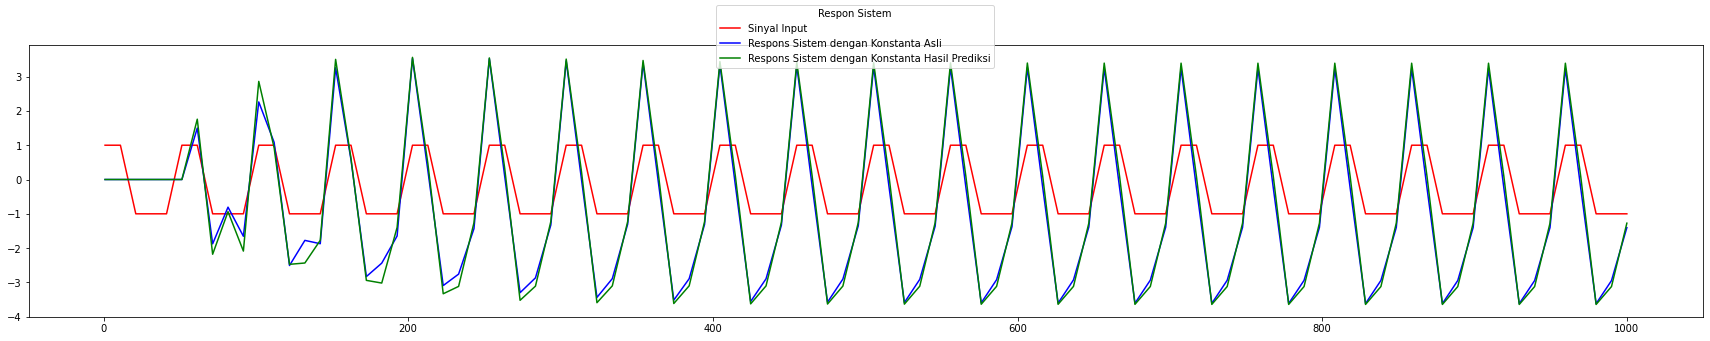

In [6]:
print("Persamaan LTI Asli")
print_transfer_function(cons)
print("")

print("Persamaan LTI Prediksi")
max_reward = Model.Max_Reward()                               # Mencari reward terbesar dalam q_matrix
konstanta_prediksi = str_cons(Model.q_matrix_state[max_reward])
print_transfer_function(konstanta_prediksi)


# perbandingan hasil
prediksi_output = Respon_Sistem(input,konstanta_prediksi)
output = Respon_Sistem (input,cons)

# plot
fig, (ax1) = plt.subplots(1, 1, figsize=(30,5))
x = np.linspace(1, 1000, 100)

l1 = ax1.plot(x, input, color="red")[0]
l2 = ax1.plot(x, output, color="blue")[0]
l3 = ax1.plot(x, prediksi_output, color="green")[0]

fig.legend((l1, l2,l3), 
           ["Sinyal Input" ,"Respons Sistem dengan Konstanta Asli", "Respons Sistem dengan Konstanta Hasil Prediksi"], 
           "upper center", 
           title= "Respon Sistem")

plt.show()

________________________________________________________________________________

Testing_Experiment

In [7]:
# y(n) = ax(n) + bx(n-1) + cy(n-1) + dy(n-2)
# y(6) = ax(6) + bx(5) + cy(5) + dy(4)
#
#
#
#
#y(100) =ax(100) +bx(99) +cy(99) +dy(98)

def Respon_Sistem_Test(input,cons):        #fungsi perhitungan output
    orde = len(cons)-2
    output = [0 for i in range (orde)]
    for i in range (10-orde):
        j = i+orde
        print("j={}".format(j))
        m = j-1
        print("m={}".format(m))
        temp = cons[0] * input[j]
        temp += cons[1] * input[m]
        k=0
        for k in range(orde):
            temp+= cons[k+1] * output[j-(k+1)]
            print("k={}".format(k))
        output.append (temp)
    return (np.array(output))

#konstanta = [1.5, 1.25, 0.15, -0.05, 0.25, 0.55, 0.05, -0.04, -0.5]
konstanta = [1.5, 1.25, 0.15, -0.05]
test_input = np.array([1,1,-1,-1,-1,1,1,-1,-1,-1])

outs=Respon_Sistem_Test(test_input, konstanta)

print(outs)



j=2
m=1
k=0
k=1
j=3
m=2
k=0
k=1
j=4
m=3
k=0
k=1
j=5
m=4
k=0
k=1
j=6
m=5
k=0
k=1
j=7
m=6
k=0
k=1
j=8
m=7
k=0
k=1
j=9
m=8
k=0
k=1
[  0.           0.          -0.25        -3.0625      -6.615625
  -8.47890625  -8.84097656 -12.57305664 -19.79246729 -29.3765426 ]


[ 1  1 -1 -1 -1  1  1 -1 -1 -1]


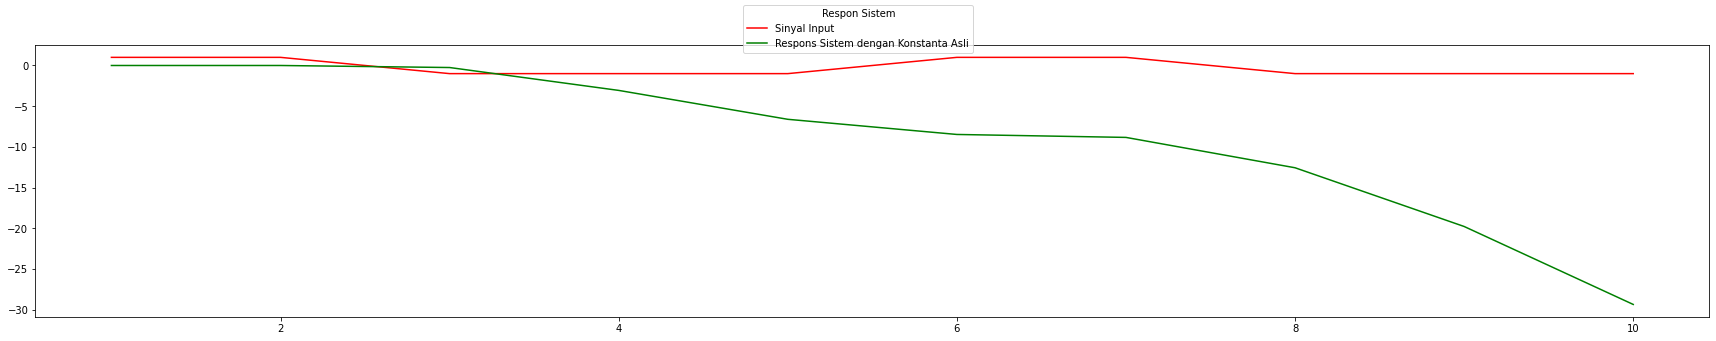

In [8]:
fig, (ax1) = plt.subplots(1, 1, figsize=(30,5))

x = np.linspace(1, 10, 10)

l1 = ax1.plot(x, test_input, color="red")[0]
l2 = ax1.plot(x, outs, color="green")[0]

print(test_input)

fig.legend((l1, l2), ["Sinyal Input" ,"Respons Sistem dengan Konstanta Asli"], "upper center", title= "Respon Sistem")

plt.show()